### PART A: Model Code
1. Implement the following funciton that generates the polynomial and interaction features for a given degree of the polynomial

polynomialFeatures(X,degree)

Argument: 
    
    X: ndarray
        A numpy array with rows representing data samples and columns representing features (d-dimensional feature)
        
    degree: integer
        The degree of the polynomial features. Default = 1

Returns:
    
    A new feature matrix consisting of all polynomial combinations fo the features with degree equal to the specified degree. For example, if an input sample is two dimensional and of the form [a,b], the degree-2 polynomial features are [a,b,a^2,ab,b^2]

In [6]:
import itertools
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# def polynomialFeatures(X, degree = 1): 
#     X = np.array(X)
#     if X.ndim == 1:
#         X = np.array([X])
#     combinations = list(itertools.combinations_with_replacement(X, degree))
#     array = []
#     for i in range(len(combinations)):
#         if combinations[i][0] == combinations[i][1]:
#             array.append(combinations[i][0] ** degree)
#         else:
#             array.append(combinations[i][0] * combinations[i][1])
#     return list(X) + array

def polynomialFeatures(X, degree = 1):
    polynomial_matrix = []
    for k in range(len(X)):
        combination = list(itertools.combinations_with_replacement(X[k], degree))
        newCombination = [1] + list(X[k])
        for i in combination:
            newCombination.append(reduce(lambda x, y: x*y, i))
            polynomial_matrix.append(newCombination)
    return polynomial_matrix

In [2]:
print(list(polynomialFeatures([1,2], 2)))
print(list(polynomialFeatures([1,2,3], 2)))


TypeError: 'int' object is not iterable

2. Implement the following funciton to calculate and return the mean squared error (mse) of two vectors. 

mse(Y_true, Y_pred)

Arguments:

    Y_true: ndarray
        1D array containing data with "float" type. True y values.
    Y_pred: ndarray
        1D array containing data with "float" type. Values predicted by your model. 
        
Returns:
    
    cost: float
        It returns a float value containing mean squared error between Y_true and Y_pred. 
    
Note: these 1D arrays should be designed as column vectors. 

In [19]:
from statistics import mean 

def mse(Y_true, Y_pred):
    Y_true = np.array(Y_true)
    print(Y_true)
    print(Y_pred)
    return mean(((Y_true[i] - Y_pred[i])**2) for i in range(len(Y_true)))


In [10]:
import math

def rmse(Y_true, Y_pred):
    return math.sqrt(mse(Y_true, Y_pred))



3. Implement the following function to compute training and validation errors. It will be used to plot learning curves. The function takes the feature matrix X (usually the training data matrix) and the training size (from the “train_size” parameter) and by using cross-validation computes the average mse for the training fold and the validation fold. It iterates through the entire X with an increment step of the “train_size”. For example, if there are 50 samples (rows) in X and the “train_size” is 10, then the function will start from the first 10 samples and will successively add 10 samples in each iteration. During each iteration it will use k-fold cross-validation to compute the average mse for the training fold and the validation fold. Thus, for example, for 50 samples there will be 5 iterations (on 10, 20, 30, 40, and 50 samples) and for each iteration it will compute the cross-validated average mse for the training and the validation fold. For training the model (using the “fit” method) it will use the model parameters from the function argument. The function will return two arrays containing training and validation root-mean-square error (rmse) values.

learning_curve(model,X,Y,cv,train_size=1,learning_rate=0.01,epochs=1000,tol=None,regularizer=None,lambd=0.0,**kwargs)

Arguments:
    
    model: object type that implements the "fit" and "predict" methods. 
        An object of that type which is cloned for each validation 
    
    X: ndarray
        A numpy array with rows representing data samples and columns representing features 
        
    Y: ndarray 
        A 1D numpy array with labels corresponding to each row of the feature matrix X.
        
    cv: int 
        integer, to specify the number of folds in a k-fold cross-validation 
        
    train_sizes: int or float
        Relative or absolute numbers of training examples that will be used to generate the learning curve. If the dtype is float, it is regarded as a fraction of the maximum size of the training set (that is determined by the selected validation method), i.e. it has to be within (0,1]. Otherwise it is interpreted as absolute sizes of the training sets. 
        
    learning_rate: float
        It provides the step size for parameter update. 
    
    epochs: int
        The maximum number of passes over the training data for updating the weight vector. 
        
    tol: float or None
        The stopping criterion. If it is not None, the iterations will stop when (error > pervious_error - tol). If it is None, the number of iterations will be set by the "epochs".
        
    regularizer: string 
        The string value couuld be one fo the following: l1, l2, None. If it's set to None, the cost function without the regulariztion term will be used for computing the gradient and updating the weight vector. 
        However, if it's set to l1 or l2, the appropriate regularized cost function needs to be used for computing the gradient and updating the weight vector. 
        
    lambd: float
        It provides the regularization coefficient. it is used only when the "regularizer" is set to l1 or l2.
        
Returns:

    train_scores: ndarray
        root-mean-square error (rmse) values on training sets.
        
    val_score: ndarray
        root-mean-square error (rmse) values on validation sets.

In [25]:
from math import sqrt
import matplotlib.pyplot as plt

def partitionHelper(data,folds):
    return np.array_split(data, folds)

def cross_val(model, X, y, folds, learning_rate, epochs, tol, regularizer, lambd, **kwargs):
    partition = partitionHelper(np.array(X),folds)
    labels_partition = partitionHelper(np.array(y),folds)
    a2 = []
    
    prediction = []
    
    for l in range(len(partition)-1):
        test_set = partition[l]
        test_label = labels_partition[l]
        train_set_unflattened = partition.copy()
        train_label_unflattened = labels_partition.copy()
        del train_set_unflattened[l]
        del train_label_unflattened[l]

        train_set = [y for x in train_set_unflattened for y in x]
        train_label = [y for x in train_label_unflattened for y in x]
            
        #normalized
        mean  = np.mean(train_set, axis=0)
        std = np.std(train_set, axis=0)
        train_set = (train_set - mean) / std
                
        test_set = (test_set - mean) / std

        #model.fit(train_set, train_label,learning_rate, epochs, tol, regularizer, lambd, **kwargs)
        # for sklearn:
        
        model.fit(train_set, train_label)
        
        #for k in range(len(partition[l])-1):
        #    prediction[k] = model.predict(partition[l][k])
        prediction= model.predict(test_set)
        
    return rmse(test_label, prediction), mse(test_label, prediction)


def our_learning_curve(model, X_lc, Y_lc, cv=5, train_size=1, learning_rate=0.01, epochs=1000, tol=None, regularizer=None, lambd=0.0, **kwargs):
    iterations = int(len(X_lc) / train_size)
    curr_size = train_size
    
    training_rmse = []
    training_size = []
    validation_rmse = []
    
    training_mse = []
    validation_mse = []
    
    for i in range(iterations - 1):
        # use k-fold cross-validation to compute the average mse for the training fold and the validation fold
        #model.fit(curr_fold, Y,learning_rate, epochs, tol, regularizer, lambd, **kwargs)
        #fold_predict = model.predict(curr_fold)
        
        #curr_fold = curr_fold + remain_data[:train_size]
        training_size.append(curr_size)
        
        curr_fold = X_lc[:curr_size]
        remain_data = X_lc[curr_size:]
        
        curr_fold_label = Y_lc[:curr_size]
        remain_label = Y_lc[curr_size:]
        
        rmse_val, mse_val = cross_val(model, curr_fold, curr_fold_label, cv, learning_rate, epochs, tol, regularizer, lambd, **kwargs)
        
        training_rmse.append(rmse_val)
        training_mse.append(mse_val)
        prediction = model.predict(remain_data)
        validation_rmse.append(rmse(remain_label, prediction))
        validation_mse.append(mse(remain_label, prediction))
        
        curr_size = curr_size + train_size
        
#     plt.figure(figsize=(10, 6))
#     plt.plot(training_size, training_mse, "r-+", linewidth=3, label="Training Score")
#     plt.plot(training_size, validation_mse, "b-", linewidth=2, label="Cross-validation Score")
#     plt.legend(loc="best", fontsize=14)   
#     plt.xlabel("Training set size", fontsize=14) 
#     plt.ylabel("Negative MSE", fontsize=14) 
#     plt.title("Learning Curve")
#     plt.show()
        
    plt.figure(figsize=(10, 6))
    plt.plot(training_size, training_rmse, "r-+", linewidth=3, label="Training Score")
    plt.plot(training_size, validation_rmse, "b-", linewidth=2, label="Cross-validation Score")
    plt.legend(loc="best", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14) 
    plt.title("Learning Curve")
    plt.show()

    return training_rmse, validation_rmse

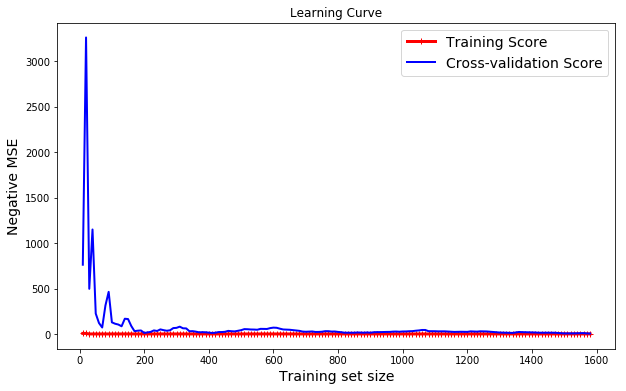

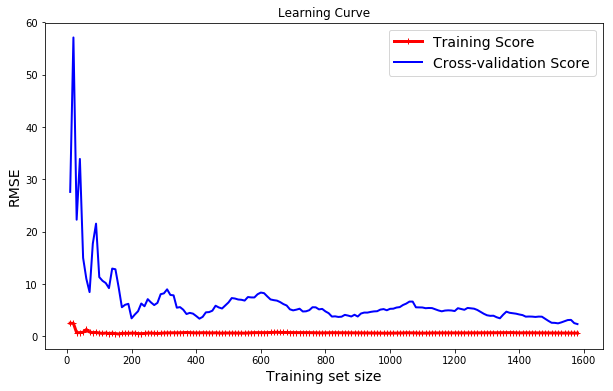

([2.5112216474563627,
  2.4837064776691227,
  0.7043230619478792,
  0.7196058888302159,
  0.7724391697647385,
  1.312545660635408,
  0.8293593951998196,
  0.7057407218200081,
  0.7563222665581393,
  0.6460755648490037,
  0.5611969305278243,
  0.6432400436720958,
  0.5468851551683692,
  0.6066050483320171,
  0.542849644544861,
  0.45756617577185626,
  0.5722347978194102,
  0.569977631216685,
  0.5821395443364019,
  0.610946102801274,
  0.6124702796604107,
  0.5342492450885954,
  0.5199352937967103,
  0.5569113891299302,
  0.6215614526256972,
  0.625825026340776,
  0.584991633818505,
  0.5534648755110364,
  0.5860545762155983,
  0.645075109073195,
  0.6578690431408258,
  0.6709348549919231,
  0.6818119079030284,
  0.669237054373475,
  0.6807577254342996,
  0.7100655118456473,
  0.7389992802149202,
  0.7058815860318458,
  0.6811824123902402,
  0.6523168028958338,
  0.6773500261294613,
  0.6985279951540835,
  0.6762100750527277,
  0.6655441335490027,
  0.6496149282599751,
  0.6859644163437

In [26]:
our_learning_curve(LinearRegression(), X_other, y_other, 5, 10)

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt

#Cross checking with sklearn 

# Learning Curve: Linear Model


# Create CV training and validation scores for various training set sizes
train_sizes, train_scores, val_scores = learning_curve(LinearRegression(), X_train, y_train, cv=5, 
                                                        scoring='neg_mean_squared_error', 
                                                        train_sizes=np.linspace(0.01, 1.0, 50),
                                                        n_jobs=-1)
                                                
                                                                                                                                                                                                                 
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of validation set scores
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)


plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, "r-+", linewidth=3, label="Training Score")
plt.plot(train_sizes, val_mean, "b-", linewidth=2, label="Cross-validation Score")
plt.legend(loc="best", fontsize=14)   
plt.xlabel("Training set size", fontsize=14) 
plt.ylabel("Negative MSE", fontsize=14) 
plt.title("Learning Curve")
plt.show()

NameError: name 'plt' is not defined

## Extra Credit

4. Implement the following function to plot the training and validation root mean square error (rmse) values of the data matrix X for various polynomial degree starting from 1 up to the value set by “maxPolynomialDegree”. It takes the data matrix X (usually the training data matrix) and the maxPolynomialDegree; and for each polynomial degree it will augment the data matrix, then use k-fold cross-validation to compute the average mse for both the training and the validation fold. For training the model (using the “fit” method) it will use the model parameters from the function argument. Finally, the function will plot the root-mean-square error (rmse) values for the training and validation folds for each degree of the data matrix starting from 1 up to the maxPolynomialDegree.

plot_polynomial_model_complexity(model, X, Y, cv, maxPolynomialDegree, learning_rate=0.01, epochs=1000, tol=None, regularizer=None, lambd=0.0, **kwargs)

Arguments:

    model: object type that implements the “fit” and “predict” methods. 
        An object of that type which is cloned for each validation.
        
    X: ndarray
        A numpy array with rows representing data samples and columns representing features.
        
    Y: ndarray
        A 1D numpy array with labels corresponding to each row of the feature matrix X.
        
    cv: int 
        integer, to specify the number of folds in a (Stratified)K-Fold
        
    maxPolynomialDegree: int 
        It will be used to determine the maximum polynomial degree for X. For example, if it is set to 3, then the function will compute both the training and validation mse values for degree 1, 2 and 3.

    learning_rate: float
        It provides the step size for parameter update.
        
    epochs: int
        The maximum number of passes over the training data for updating the weight vector.
        
    tol: float or None
        The stopping criterion. If it is not None, the iterations will stop when (error > previous_error - tol). If it is None, the number of iterations will be set by the “epochs”.
        
    regularizer: string 
        The string value could be one of the following: l1, l2, None.
        If it’s set to None, the cost function without the regularization term will be used for computing the gradient and updating the weight vector. 
        However, if it’s set to l1 or l2, the appropriate regularized cost function needs to be used for computing the gradient and updating the weight vector.
        
    lambd: float
        It provides the regularization coefficient.It is used only when the “regularizer” is set to l1 or l2.
        
Returns:
    There is no return value. This function plots the root-mean-square error (rmse) values for both the training set and the validation set for degree of X between 1 and maxPolynomialDegree.

In [61]:
import numpy as np
import matplotlib.pyplot as plt

def plot_polynomial_model_complexity(model, X, Y, cv, maxPolynomialDegree, learning_rate=0.01, epochs=1000, tol=None, regularizer=None, lambd=0.0, **kwargs):
    
    
    # RMSE vs. Degree Curve

    degreeList = list(range(1, maxPolynomialDegree + 1))

    mse_train, mse_test = [], []
    
    #need to use degree, cv

    for degree in degreeList:

        #TODO: Change this with our code
        #model = make_pipeline(PolynomialFeatures(degree, include_bias=False), StandardScaler(), LinearRegression()) 
        model = LinearRegression()
  
        model.fit(X_train, y_train, learning_rate, epochs, tol, regularizer, lambd)
       
        # Make prediction 
        y_train_predicted = model.predict(X_train)
        y_test_predicted = model.predict(X_test)
    
        mse_train.append(rmse(y_train, y_train_predicted))
        mse_test.append(rmse(y_test, y_test_predicted))
        
        
        
    plt.figure(figsize=(10, 6))   
    plt.plot(degreeList, np.sqrt(mse_test), "ro-", alpha=1.0, linewidth=1.0, label="Test RMSE")
    plt.plot(degreeList, np.sqrt(mse_train), "bo-", alpha=1.0, linewidth=1.0, label="Train RMSE")    
    plt.legend(loc="best", fontsize=14) 
    plt.xlabel("Degree")
    plt.ylabel("RMSE")
    plt.title("RMSE for Varying Degree")
    plt.show()

    
    return

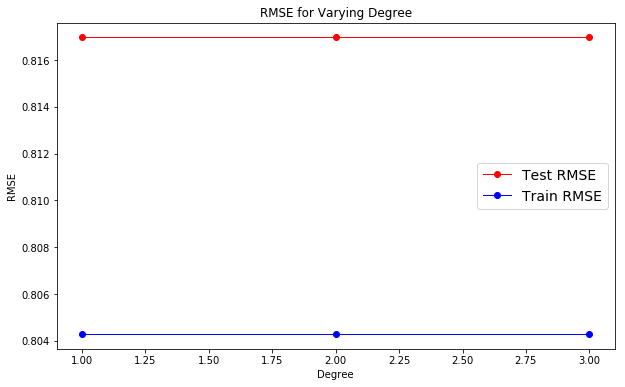

In [60]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
plot_polynomial_model_complexity(reg, X, y,3, 3)

5. ImplementaLinear_Regression model class. It should have the following three methods. Note the that “fit” method should implement the batch gradient descent algorithm. 

    a. 
    fit(self, X, Y, learning_rate=0.01, epochs=1000, tol=None, regularizer=None, lambd=0.0, **kwargs)
    
    Arguments:
        
        X: ndarray
            A numpy array with rows representing data samples and columns representing features.
            
        Y: ndarray
            A 1D numpy array with labels corresponding to each row of the feature matrix X.
            
        learning_rate: float
            It provides the step size for parameter update.
            
        epochs: int
            The maximum number of passes over the training data for updating the weight vector. 
            
        tol: float or None
            The stopping criterion. If it is not None, the iterations will stop when (error > previous_error - tol). If it is None, the number of iterations will be set by the “epochs”.
            
        regularizer: string
            The string value could be one of the following: l1, l2, None. 
            If it’s set to None, the cost function without the regularization term will be used for computing the gradient and updating the weight vector. 
            However, if it’s set to l1 or l2, the appropriate regularized cost function needs to be used for computing the gradient and updating the weight vector. 
            
            Note: you may define two helper functions for computing the regularized cost for “l1” and “l2” regularizers. 
            
        lambd: float
            It provides the regularization coefficient. It is used only when the “regularizer” is set to l1 or l2.
          
Returns: 
    No return value necessary
    
Note: the “fit” method should use a weight vector “theta_hat” that contains the parameters for the model (one parameter for each feature and one for bias). The "theta_hat" should be a 1D column vector. 

Finally, it should update the model parameter "theta" to be used in "predict" method as follows.
    
        self.theta = theta_hat
    
    b. 
    predict(self,X) 
    
    Arguments:
        X: ndarray
            A numpy array containing samples to be used for prediction. Its rows represent data samples and columns represent features.
   
    Returns: 
        1D array of predictions for each row in X.
        The 1D array should be designed as a column vector.
        
    Note: the “predict” method uses the self.theta to make predictions.
    
    __init__(self)
        It's a standard python initialization function so we can instantiate the class. Just "pass" this.


In [58]:
import numpy as np

class Linear_Regression:
    def fit(self, X, Y, learning_rate=0.01, epochs=1000, tol=None, regularizer=None, lambd=0.0, **kwargs):
        prev_tol = 1
        m = X.shape[1]
        
        theta_hat = np.zeros(m).reshape(-1,1)
        print("theta_hat \n", theta_hat)
#         self.theta = theta_hat
        precision = 0.001
        iters = 0
        theta_hat = theta_hat.T[0]


        while prev_tol > precision and iters < epochs:
            print("Epoch", iters)
            print(theta_hat.T)
            print(theta_hat.T[0])
            print(theta_hat.T)

            y_hat = np.matmul(X,theta_hat)
            print("This is y \n", y)
            print("This is y_hat \n", y_hat)
            print("y_hat size \n", len(y_hat))
            error = mse(y, y_hat)
            print("error", error)
            theta_hat = np.subtract(theta_hat, (learning_rate/m) * np.dot(X.T, np.subtract(y_hat, Y)))
            print("theta_hat \n", theta_hat)
            y_hat_update = np.matmul(X,theta_hat)
            print("y_hat_update \n", y_hat_update)
            new_error = mse(y, y_hat_update.T)
            print("new_error", new_error)

            prev_tol = new_error - error
            print("prev_tol", prev_tol)
            iters += 1
        
        self.theta = theta_hat

        return
    
    def predict(self, X):
        # the “predict” method uses the self.theta to make predictions.
        return # 1D array of predictions for each row in X, The 1D array should be designed as a column vector.
    
    def __init__(self):
        pass

In [59]:
lin_regression = Linear_Regression()
lin_regression.fit(X, y)

theta_hat 
 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Epoch 0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
This is y 
 0       5
1       5
2       5
3       6
4       5
5       5
6       5
7       7
8       7
9       5
10      5
11      5
12      5
13      5
14      5
15      5
16      7
17      5
18      4
19      6
20      6
21      5
22      5
23      5
24      6
25      5
26      5
27      5
28      5
29      6
       ..
1569    6
1570    6
1571    6
1572    5
1573    6
1574    6
1575    6
1576    6
1577    6
1578    6
1579    5
1580    6
1581    5
1582    5
1583    5
1584    7
1585    6
1586    6
1587    6
1588    6
1589    5
1590    6
1591    6
1592    6
1593    6
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64
This is y_hat 
 [0. 0. 0. ... 0. 0. 0.]
y_hat size 
 1599
[5 5 5 ... 6 5 6]
[0. 0. 0. ... 0. 0. 0.]
error 32.41651031894934
theta_hat 
 [ 68.41390909   4.24224545   2.27176364

new_error 4.031204401122085e+38
prev_tol 4.031204259365798e+38
Epoch 5
[3.76354544e+16 2.46161081e+15 1.26385771e+15 1.25449935e+16
 4.08125519e+14 9.52117012e+16 3.11003507e+17 4.58025723e+15
 1.51869252e+16 3.04751901e+15 4.72748850e+16]
3.763545442674797e+16
[3.76354544e+16 2.46161081e+15 1.26385771e+15 1.25449935e+16
 4.08125519e+14 9.52117012e+16 3.11003507e+17 4.58025723e+15
 1.51869252e+16 3.04751901e+15 4.72748850e+16]
This is y 
 0       5
1       5
2       5
3       6
4       5
5       5
6       5
7       7
8       7
9       5
10      5
11      5
12      5
13      5
14      5
15      5
16      7
17      5
18      4
19      6
20      6
21      5
22      5
23      5
24      6
25      5
26      5
27      5
28      5
29      6
       ..
1569    6
1570    6
1571    6
1572    5
1573    6
1574    6
1575    6
1576    6
1577    6
1578    6
1579    5
1580    6
1581    5
1582    5
1583    5
1584    7
1585    6
1586    6
1587    6
1588    6
1589    5
1590    6
1591    6
1592    6
1593   

 1599
[5 5 5 ... 6 5 6]
[-5.36025088e+37 -1.03778391e+38 -8.22228898e+37 ... -6.92051655e+37
 -7.55682286e+37 -6.73891582e+37]
error 7.497168375327825e+75
theta_hat 
 [8.65514971e+38 5.66104776e+37 2.90653534e+37 2.88501363e+38
 9.38579746e+36 2.18961502e+39 7.15225118e+39 1.05333688e+38
 3.49258736e+38 7.00848014e+37 1.08719614e+39]
y_hat_update 
 [2.85845501e+41 5.53417867e+41 4.38469088e+41 ... 3.69049615e+41
 4.02981850e+41 3.59365413e+41]
[5 5 5 ... 6 5 6]
[2.85845501e+41 5.53417867e+41 4.38469088e+41 ... 3.69049615e+41
 4.02981850e+41 3.59365413e+41]
new_error 2.13201253411931e+83
prev_tol 2.132012459147626e+83
Epoch 11
[8.65514971e+38 5.66104776e+37 2.90653534e+37 2.88501363e+38
 9.38579746e+36 2.18961502e+39 7.15225118e+39 1.05333688e+38
 3.49258736e+38 7.00848014e+37 1.08719614e+39]
8.655149710645689e+38
[8.65514971e+38 5.66104776e+37 2.90653534e+37 2.88501363e+38
 9.38579746e+36 2.18961502e+39 7.15225118e+39 1.05333688e+38
 3.49258736e+38 7.00848014e+37 1.08719614e+39]
This i

error 3.965082232533954e+120
theta_hat 
 [1.99045357e+61 1.30188998e+60 6.68425601e+59 6.63476181e+60
 2.15848306e+59 5.03553050e+61 1.64482700e+62 2.42239387e+60
 8.03201932e+60 1.61176349e+60 2.50026112e+61]
y_hat_update 
 [6.57368407e+63 1.27271348e+64 1.00836195e+64 ... 8.48715675e+63
 9.26750766e+63 8.26444594e+63]
[5 5 5 ... 6 5 6]
[6.57368407e+63 1.27271348e+64 1.00836195e+64 ... 8.48715675e+63
 9.26750766e+63 8.26444594e+63]
new_error 1.1275730509662615e+128
prev_tol 1.127573011315439e+128
Epoch 17
[1.99045357e+61 1.30188998e+60 6.68425601e+59 6.63476181e+60
 2.15848306e+59 5.03553050e+61 1.64482700e+62 2.42239387e+60
 8.03201932e+60 1.61176349e+60 2.50026112e+61]
1.9904535695496792e+61
[1.99045357e+61 1.30188998e+60 6.68425601e+59 6.63476181e+60
 2.15848306e+59 5.03553050e+61 1.64482700e+62 2.42239387e+60
 8.03201932e+60 1.61176349e+60 2.50026112e+61]
This is y 
 0       5
1       5
2       5
3       6
4       5
5       5
6       5
7       7
8       7
9       5
10      5
11   

new_error 5.963478004553859e+172
prev_tol 5.963477794849657e+172
Epoch 23
[4.57751228e+83 2.99399970e+82 1.53720059e+82 1.52581824e+83
 4.96393530e+81 1.15803770e+84 3.78266336e+84 5.57085977e+82
 1.84715020e+83 3.70662611e+82 5.74993367e+83]
4.57751228457664e+83
[4.57751228e+83 2.99399970e+82 1.53720059e+82 1.52581824e+83
 4.96393530e+81 1.15803770e+84 3.78266336e+84 5.57085977e+82
 1.84715020e+83 3.70662611e+82 5.74993367e+83]
This is y 
 0       5
1       5
2       5
3       6
4       5
5       5
6       5
7       7
8       7
9       5
10      5
11      5
12      5
13      5
14      5
15      5
16      7
17      5
18      4
19      6
20      6
21      5
22      5
23      5
24      6
25      5
26      5
27      5
28      5
29      6
       ..
1569    6
1570    6
1571    6
1572    5
1573    6
1574    6
1575    6
1576    6
1577    6
1578    6
1579    5
1580    6
1581    5
1582    5
1583    5
1584    7
1585    6
1586    6
1587    6
1588    6
1589    5
1590    6
1591    6
1592    6
1593 

 [3.47667234e+108 6.73109278e+108 5.33299752e+108 ... 4.48866462e+108
 4.90137451e+108 4.37087793e+108]
y_hat size 
 1599
[5 5 5 ... 6 5 6]
[3.47667234e+108 6.73109278e+108 5.33299752e+108 ... 4.48866462e+108
 4.90137451e+108 4.37087793e+108]
error 3.1539481969990607e+217
theta_hat 
 [-5.61375209e+109 -3.67176996e+108 -1.88518621e+108 -1.87122717e+109
 -6.08765208e+107 -1.42018987e+110 -4.63896829e+110 -6.83196980e+108
 -2.26530103e+109 -4.54571803e+108 -7.05158178e+109]
y_hat_update 
 [-1.85400118e+112 -3.58948234e+112 -2.84392164e+112 ... -2.39366518e+112
 -2.61375052e+112 -2.33085320e+112]
[5 5 5 ... 6 5 6]
[-1.85400118e+112 -3.58948234e+112 -2.84392164e+112 ... -2.39366518e+112
 -2.61375052e+112 -2.33085320e+112]
new_error 8.969062386398617e+224
prev_tol 8.969062071003797e+224
Epoch 30
[-5.61375209e+109 -3.67176996e+108 -1.88518621e+108 -1.87122717e+109
 -6.08765208e+107 -1.42018987e+110 -4.63896829e+110 -6.83196980e+108
 -2.26530103e+109 -4.54571803e+108 -7.05158178e+109]
-5.61375

error 1.668051633921944e+262
theta_hat 
 [-1.29101324e+132 -8.44409152e+130 -4.33542543e+130 -4.30332337e+131
 -1.39999760e+130 -3.26605788e+132 -1.06683897e+133 -1.57117082e+131
 -5.20958814e+131 -1.04539390e+131 -1.62167572e+132]
y_hat_update 
 [-4.26370819e+134 -8.25485195e+134 -6.54026120e+134 ... -5.50479143e+134
 -6.01092902e+134 -5.36034064e+134]
[5 5 5 ... 6 5 6]
[-4.26370819e+134 -8.25485195e+134 -6.54026120e+134 ... -5.50479143e+134
 -6.01092902e+134 -5.36034064e+134]
new_error 4.7435335756671994e+269
prev_tol 4.743533408862036e+269
Epoch 36
[-1.29101324e+132 -8.44409152e+130 -4.33542543e+130 -4.30332337e+131
 -1.39999760e+130 -3.26605788e+132 -1.06683897e+133 -1.57117082e+131
 -5.20958814e+131 -1.04539390e+131 -1.62167572e+132]
-1.2910132426070255e+132
[-1.29101324e+132 -8.44409152e+130 -4.33542543e+130 -4.30332337e+131
 -1.39999760e+130 -3.26605788e+132 -1.06683897e+133 -1.57117082e+131
 -5.20958814e+131 -1.04539390e+131 -1.62167572e+132]
This is y 
 0       5
1       5
2  

new_error inf
prev_tol inf
Epoch 41
[5.56752172e+150 3.64153220e+149 1.86966132e+149 1.85581724e+150
 6.03751904e+148 1.40849432e+151 4.60076545e+151 6.77570715e+149
 2.24664582e+150 4.50828312e+149 6.99351058e+150]
5.5675217153441815e+150
[5.56752172e+150 3.64153220e+149 1.86966132e+149 1.85581724e+150
 6.03751904e+148 1.40849432e+151 4.60076545e+151 6.77570715e+149
 2.24664582e+150 4.50828312e+149 6.99351058e+150]
This is y 
 0       5
1       5
2       5
3       6
4       5
5       5
6       5
7       7
8       7
9       5
10      5
11      5
12      5
13      5
14      5
15      5
16      7
17      5
18      4
19      6
20      6
21      5
22      5
23      5
24      6
25      5
26      5
27      5
28      5
29      6
       ..
1569    6
1570    6
1571    6
1572    5
1573    6
1574    6
1575    6
1576    6
1577    6
1578    6
1579    5
1580    6
1581    5
1582    5
1583    5
1584    7
1585    6
1586    6
1587    6
1588    6
1589    5
1590    6
1591    6
1592    6
1593    6
1594    

C:\Users\vdoan\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in double_scalars
  import sys
C:\Users\vdoan\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in double_scalars


# Data Processing [DONE]

In [4]:
import pandas as pd
df = pd.read_csv('winequality-red.csv', delimiter=",")
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [3]:

shuffle = df.sample(frac=1)

# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy import stats

# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(df)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

IndexError: index -1 is out of bounds for axis 0 with size 0

<Figure size 0x0 with 0 Axes>

In [5]:
def partition(X, y,t):
    X_test = X[:int(t*len(X))]
    y_test = y[:int(t*len(y))]
    X_train = X[int(t*len(X)):]
    y_train = y[int(t*len(y)):]
    
    return X_train, y_train, X_test, y_test

X = df.drop(columns='density')
X = df.drop(columns='quality')
y = df['quality']
X_other = X
y_other = y

X_train, y_train, X_test, y_test = partition(X, y, 0.2)

# Model Evaluation

In [28]:
def predict_set(X_test,knn):
    prediction = [1] * len(X_test)
    for k in range(len(X_test)-1):
        prediction[k] = knn.predict(X_test[k])
    return prediction

def cross_val(training_features,training_labels,model,j,i,error_function,folds):
    partition = partitionHelper(np.array(training_features),folds)
    labels_partition = partitionHelper(np.array(training_labels),folds)
    a2 = []
    
    for l in range(len(partition)-1):
        test_set = partition[l]
        test_label = labels_partition[l]
        train_set_unflattened = partition.copy()
        train_label_unflattened = labels_partition.copy()
        del train_set_unflattened[l]
        del train_label_unflattened[l]

        train_set = [y for x in train_set_unflattened for y in x]
        train_label = [y for x in train_label_unflattened for y in x]
                
        mean  = np.mean(train_set, axis=0)
        std = np.std(train_set, axis=0)
        train_set = (train_set - mean) / std
                
        test_set = (test_set - mean) / std

        model.fit(train_set,train_label, j, i)
        #for k in range(len(partition[l])-1):
        #    prediction[k] = model.predict(partition[l][k])
        prediction = predict_set(test_set,model) 
        if (error_function.lower() == 'f1'):
            accuracy = f1_score(prediction, test_label)
            a2.append(accuracy)
        elif (error_function.lower() == 'precision'):
            accuracy = precision_score(prediction, test_label)
            a2.append(accurary)
        elif (error_function.lower() == 'accuracy'):
            accuracy = accuracy_score(prediction, test_label)
        elif(error_function.lower() == 'recall'):
            accuracy = recall_score(prediction, test_label)
            a2.append(accuracy)
        else:
            accuracy = f1_score(prediction, test_label)
            a2.append(accuracy)
    return {'average_error': a2, 'pred': prediction, 'labels': test_label}

#    def fit(self,training_features,training_labels,k,distance_f):

def kFold(folds, data, labels, model, model_args, error_fuction):
    accuracyMatrix = []
    arguments = model_args[0]
    p = model_args[1]
    #predictions = np.array([])
    total_cross_val = []
    
    for i in p:
        a = []
        cross_val2 = []
        for j in arguments:
            a2 = cross_val(data,labels,model, j,i,error_function,folds)
            cross_val2.append(a2)
            a.append(mean(a2['average_error'])/folds)
        accuracyMatrix.append(a)
        total_cross_val.append(cross_val2)
    
    i_index = 0
    j_index = 0
    maxAccuracy = accuracyMatrix[0][0]
    for i in range(len(accuracyMatrix)):
        for j in range(len(accuracyMatrix[0])):
            if(maxAccuracy < accuracyMatrix[i][j]):
                maxAccuracy = accuracyMatrix[i][j]
                i_index = i
                j_index = j
    print("Max Error Function:", maxAccuracy)

    return total_cross_val[i_index][j_index]

In [ ]:
lambd = [1.0, 0, 0.1, 0.01, 0.001, 0.0001]
learning_rate = [1.0, 0.1, 0.01, 0.001, 0.001]
regularizer = [l1, l2]

kFold(3, X_train, y_train, LinearRegularization, [lambd, learning_rate], regularizer)